#### For some actions, you may want to require human approval before running to ensure that everything is running as intended.

In [1]:
from typing import Annotated
import operator,json
from typing import TypedDict, Annotated, Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph,END,START
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.tools import tool
from langchain_community.tools.tavily_search import TavilySearchResults

In [2]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")

In [3]:
llm.invoke("hi")

AIMessage(content='Hi! 👋 \n\nWhat can I do for you today?\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 11, 'total_tokens': 27, 'completion_time': 0.029090909, 'prompt_time': 0.001917446, 'queue_time': 0.244997195, 'total_time': 0.031008355}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--ef819698-ae04-4d0d-b412-0288a6b11960-0', usage_metadata={'input_tokens': 11, 'output_tokens': 16, 'total_tokens': 27})

In [4]:
llm.invoke("hi").content

'Hello! 👋 \n\nHow can I help you today?\n'

In [4]:
@tool
def multiply(first_number:int, second_number:int)->int:
    """multiply two integer number"""
    return first_number * second_number

In [5]:
multiply({"first_number":24,"second_number":364})

C:\Users\sowmy\AppData\Local\Temp\ipykernel_18520\2089873997.py:1: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  multiply({"first_number":24,"second_number":364})


8736

In [6]:
multiply.invoke({"first_number":24,"second_number":364})

8736

In [7]:
@tool
def search(query:str):
    """perform the web search on the user query"""
    tavily=TavilySearchResults()
    result=tavily.invoke(query)
    return result

In [8]:
search("who is a current president of USA?")

[{'url': 'https://ballotpedia.org/President_of_the_United_States',
  'content': 'The **President of the United States** (POTUS) is the head of the United States government. [Article II of the U.S. Constitution](/Article_II,_United_States_Constitution "Article II, United States Constitution") laid out the requirements and roles of the president.[[1]](#cite_note-1) The current President of the United States is [Donald Trump](https://ballotpedia.org/Donald_Trump) (R). Trump assumed office in 2025.\n\n## Election requirements [...] | [v](/Template:Executive_branch "Template:Executive branch")\xa0•\xa0[e](https://ballotpedia.org/wiki/index.php?title=Template:Executive_branch&action=edit) [U.S. Executive Branch](/Executive_Branch "Executive Branch") | | |\n| --- | --- | --- |\n|  |\n| Elected offices | President [Donald Trump](/Donald_Trump "Donald Trump") • Vice President [J.D. Vance](/J.D._Vance "J.D. Vance")   --- | [Executive-Branch-Logo.png](/Executive_Branch "Executive Branch") |\n|  |

In [9]:
search.invoke("who is a current president of USA?")

[{'url': 'https://www.usa.gov/presidents',
  'content': 'Learn about the duties of president, vice president, and first lady of the United States. Find out how to contact and learn more about current and past leaders.\n\n## President of the United States\n\nThe president of the United States is the:\n\n### Current president\n\n[The 47th and current president of the United States is Donald John Trump.](https://www.whitehouse.gov/administration/donald-j-trump/)\xa0He was sworn into office on January 20, 2025.\n\n### Former U.S. presidents [...] [The 50th and current vice president of the United States is James David (JD) Vance.](https://www.whitehouse.gov/administration/jd-vance/) He was sworn in on January 20, 2025\n\n### Former vice presidents\n\n[Read about past presidents and vice presidents.](https://history.house.gov/Institution/Presidents-Coinciding/Presidents-Coinciding/)\n\n## First lady'},
 {'url': 'https://timesofindia.indiatimes.com/world/us/list-of-presidents-of-us/featuresh

In [10]:
tools=[search,multiply]

In [11]:
model_with_tools = llm.bind_tools(tools)

In [12]:
tool_mapping={tool.name: tool for tool in tools}

In [13]:
tool_mapping

{'search': StructuredTool(name='search', description='perform the web search on the user query', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x00000256472E05E0>),
 'multiply': StructuredTool(name='multiply', description='multiply two integer number', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x0000025644B842C0>)}

In [14]:
response = model_with_tools.invoke("who is a current president of USA?")

In [15]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '402fbjn34', 'function': {'arguments': '{"query":"who is the current president of USA"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 84, 'prompt_tokens': 1075, 'total_tokens': 1159, 'completion_time': 0.152727273, 'prompt_time': 0.040531342, 'queue_time': 0.24791122000000002, 'total_time': 0.193258615}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--fabaf624-5bcf-4338-8a9e-dab3fd9d6bd6-0', tool_calls=[{'name': 'search', 'args': {'query': 'who is the current president of USA'}, 'id': '402fbjn34', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1075, 'output_tokens': 84, 'total_tokens': 1159})

In [17]:
tool_details=response.additional_kwargs.get("tool_calls")

In [18]:
tool_details

[{'id': 'xwgjsb5bg',
  'function': {'arguments': '{"query":"current president of USA"}',
   'name': 'search'},
  'type': 'function'}]

In [19]:
tool_details[0]["function"]["name"]

'search'

In [20]:
tool_details[0]["function"]["arguments"]

'{"query":"current president of USA"}'

In [21]:
json.loads(tool_details[0]["function"]["arguments"])

{'query': 'current president of USA'}

In [22]:
tool_mapping[tool_details[0]["function"]["name"]].invoke(json.loads(tool_details[0]["function"]["arguments"]))

[{'url': 'https://www.usa.gov/presidents',
  'content': 'Learn about the duties of president, vice president, and first lady of the United States. Find out how to contact and learn more about current and past leaders.\n\n## President of the United States\n\nThe president of the United States is the:\n\n### Current president\n\n[The 47th and current president of the United States is Donald John Trump.](https://www.whitehouse.gov/administration/donald-j-trump/)\xa0He was sworn into office on January 20, 2025.\n\n### Former U.S. presidents [...] [The 50th and current vice president of the United States is James David (JD) Vance.](https://www.whitehouse.gov/administration/jd-vance/) He was sworn in on January 20, 2025\n\n### Former vice presidents\n\n[Read about past presidents and vice presidents.](https://history.house.gov/Institution/Presidents-Coinciding/Presidents-Coinciding/)\n\n## First lady [...] The First lady of the United States has traditionally been the wife or other close fem

In [16]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [17]:
def invoke_model(state:AgentState):
    messages = state['messages']
    question = messages[-1]   ## Fetching the user question
    return {"messages":[model_with_tools.invoke(question)]}

In [18]:
def invoke_tool(state:AgentState):
    tool_details= state['messages'][-1].additional_kwargs.get("tool_calls", [])[0]
    
    if tool_details is None:
        raise Exception("no tool call found")
    
    print(f'Selected tool: {tool_details.get("function").get("name")}')
    
    if tool_details.get("function").get("name")=="search":
        response = input(prompt=f"[y/n] continue with expensive web search?")
        if response == "n":
            raise Exception("web search discard")
        
    response = tool_mapping[tool_details['function']['name']].invoke(json.loads(tool_details.get("function").get("arguments")))
    return {"messages" : [response]}

In [19]:
def router(state):
    tool_calls = state['messages'][-1].additional_kwargs.get("tool_calls", [])
    if len(tool_calls):
        return "tool"
    else:
        return "end"

In [20]:
graph = StateGraph(AgentState) ### StateGraph with AgentState

graph.add_node("ai_assistant", invoke_model)

graph.add_node("tool", invoke_tool)

In [21]:
graph.add_conditional_edges("ai_assistant", router, {"tool": "tool","end": END,})

graph.add_edge("tool", END)

#graph.add_edge("tool", "ai_assistant")

graph.set_entry_point("ai_assistant")

In [22]:
app = graph.compile()

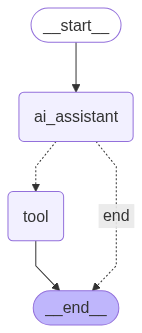

In [23]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [25]:
for s in app.stream({"messages": ["who is upcoming president of USA?"]}):
    print(list(s.values())[0])
    print("----")

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'r3n0edhyv', 'function': {'arguments': '{"query":"who is the upcoming president of USA"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 86, 'prompt_tokens': 1074, 'total_tokens': 1160, 'completion_time': 0.156363636, 'prompt_time': 0.037741469, 'queue_time': 0.249879041, 'total_time': 0.194105105}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--6bccaeda-6537-41ad-bdb7-2ffc8adafa72-0', tool_calls=[{'name': 'search', 'args': {'query': 'who is the upcoming president of USA'}, 'id': 'r3n0edhyv', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1074, 'output_tokens': 86, 'total_tokens': 1160})]}
----
Selected tool: search
{'messages': [[{'url': 'https://www.bbc.com/news/articles/cde7ng85jwgo', 'content': "Republican Donald Trump will be the next US president, after he defeated 

In [32]:
for s in app.stream({"messages": ["what is multiplication of 23 and 46?"]}):
    print(list(s.values())[0])
    print("----")

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'tv94ggzqm', 'function': {'arguments': '{"first_number":23,"second_number":46}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 93, 'prompt_tokens': 1079, 'total_tokens': 1172, 'completion_time': 0.169090909, 'prompt_time': 0.046264845, 'queue_time': 0.249673955, 'total_time': 0.215355754}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--bdef8ebc-0c2b-4f65-9972-8c81d39f4db6-0', tool_calls=[{'name': 'multiply', 'args': {'first_number': 23, 'second_number': 46}, 'id': 'tv94ggzqm', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1079, 'output_tokens': 93, 'total_tokens': 1172})]}
----
Selected tool: multiply
{'messages': [1058]}
----


In [33]:
for s in app.stream({"messages": ["what is the total amount of money exist over the earth?"]}):
    print(list(s.values())[0])
    print("----")

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'a0c9ryy5a', 'function': {'arguments': '{"query":"what is the total amount of money exist over the earth"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 90, 'prompt_tokens': 1079, 'total_tokens': 1169, 'completion_time': 0.163636364, 'prompt_time': 0.037687077, 'queue_time': 0.24883757299999998, 'total_time': 0.201323441}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--ee6d7ad9-007b-476c-a4c4-0b04dfb2d63c-0', tool_calls=[{'name': 'search', 'args': {'query': 'what is the total amount of money exist over the earth'}, 'id': 'a0c9ryy5a', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1079, 'output_tokens': 90, 'total_tokens': 1169})]}
----
Selected tool: search
{'messages': [[{'url': 'https://www.reddit.com/r/NoStupidQuestions/comments/1ibpgjd/how_much_money_exists_in_the_w

#### LangGraph supports human-in-the-loop workflows in a number of ways. In this section, we will use LangGraph's interrupt_before functionality to always break the tool node.

In [34]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")

In [35]:
class AgentState(TypedDict):
    messages: Annotated[list, add_messages]

In [36]:
tavily=TavilySearchResults()

In [37]:
tools = [tavily]

In [38]:
llm_with_tools = llm.bind_tools(tools)

In [39]:
def ai_assistant(state: AgentState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [40]:
memory = MemorySaver()

In [41]:
graph_builder = StateGraph(AgentState)
graph_builder.add_node("ai_assistant", ai_assistant)

tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

In [42]:
graph_builder.add_edge(START, "ai_assistant")

graph_builder.add_conditional_edges(
    "ai_assistant",
    tools_condition,
)
graph_builder.add_edge("tools", "ai_assistant")

In [43]:
app2 = graph_builder.compile(
    checkpointer=memory,
    # This is new!
    interrupt_before=["tools"],
    # Note: can also interrupt __after__ tools, if desired.
    # interrupt_after=["tools"]
)

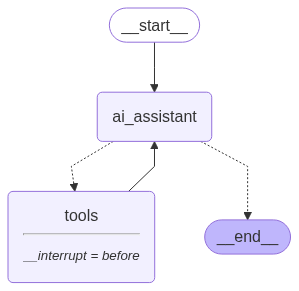

In [44]:
from IPython.display import Image, display
display(Image(app2.get_graph().draw_mermaid_png()))

In [45]:
user_input = "what is current a capital of india?"
config = {"configurable": {"thread_id": "1"}}

In [46]:
# The config is the **second positional argument** to stream() or invoke()!
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [47]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

what is current a capital of india?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (h8bbfx4f1)
 Call ID: h8bbfx4f1
  Args:
    query: capital of india


In [48]:
snapshot = app2.get_state(config)

In [49]:
snapshot.next

('tools',)

In [50]:
last_message=snapshot.values["messages"][-1]

In [51]:
last_message.tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'capital of india'},
  'id': 'h8bbfx4f1',
  'type': 'tool_call'}]

In [52]:
# `None` will append nothing new to the current state, letting it resume as if it had never been interrupted
events = app2.stream(None, config, stream_mode="values")

In [53]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (h8bbfx4f1)
 Call ID: h8bbfx4f1
  Args:
    query: capital of india
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://en.wikipedia.org/wiki/New_Delhi", "content": "ˈdɪlːiː]](https://en.wikipedia.org/wiki/Help:IPA/Hindi_and_Urdu \"Help:IPA/Hindi and Urdu\")) is the [capital](https://en.wikipedia.org/wiki/Capital_city \"Capital city\") of [India](https://en.wikipedia.org/wiki/India \"India\") and a part of the [National Capital Territory of Delhi](https://en.wikipedia.org/wiki/Delhi \"Delhi\") (NCT). New Delhi is the seat of all three branches of the [Government of India](https://en.wikipedia.org/wiki/Government_of_India \"Government of India\"), hosting the [...] The national capital of India, New Delhi is jointly administered by both the Central [Government of India](https://en.wikipe

In [54]:
user_input = "what is a weather there?"

config = {"configurable": {"thread_id": "1"}}

In [55]:
# The config is the **second positional argument** to stream() or invoke()!
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [56]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

what is a weather there?
================================== Ai Message ==================================

You'll need to provide a location for me to tell you the weather there! 

For example, you could ask:

"What is the weather in London?" 
"What is the weather like in Paris?"
"What's the forecast for Tokyo?"


In [57]:
snapshot = app2.get_state(config)

In [58]:
snapshot.next

()

In [59]:
last_message=snapshot.values["messages"][-1]

In [60]:
last_message.tool_calls

[]

In [61]:
# `None` will append nothing new to the current state, letting it resume as if it had never been interrupted
events = app2.stream(None, config, stream_mode="values")

In [62]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================

You'll need to provide a location for me to tell you the weather there! 

For example, you could ask:

"What is the weather in London?" 
"What is the weather like in Paris?"
"What's the forecast for Tokyo?"


In [63]:
app2.get_state(config)

StateSnapshot(values={'messages': [HumanMessage(content='what is current a capital of india?', additional_kwargs={}, response_metadata={}, id='909cef2a-23b6-4a28-9ac8-e47770413eba'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'h8bbfx4f1', 'function': {'arguments': '{"query":"capital of india"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 87, 'prompt_tokens': 988, 'total_tokens': 1075, 'completion_time': 0.158181818, 'prompt_time': 0.042968764, 'queue_time': 0.27017736600000003, 'total_time': 0.201150582}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--c8d0b584-e826-4c22-a40a-02b03a558b08-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'capital of india'}, 'id': 'h8bbfx4f1', 'type': 'tool_call'}], usage_metadata={'input_tokens': 988, 'output_tokens': 87, 'total_tokens': 1075}), ToolMessage

In [64]:
snapshot=app2.get_state(config)

In [65]:
snapshot.next

()

In [66]:
user_input = "give me the recent news of it?"

config = {"configurable": {"thread_id": "1"}}

In [67]:
# The config is the **second positional argument** to stream() or invoke()!
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [68]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

give me the recent news of it?
================================== Ai Message ==================================

Please tell me what "it" refers to so I can give you recent news about it!  

For example, are you interested in news about:

* A specific country? (e.g., "Give me recent news about India.")
* A particular topic? (e.g., "Give me recent news about climate change.")
* A company or organization? (e.g., "Give me recent news about Apple.") 


Let me know and I'll do my best to find some recent news for you!


In [69]:
snapshot=app2.get_state(config)

In [70]:
current_message = snapshot.values["messages"][-1]

In [71]:
current_message.pretty_print()

================================== Ai Message ==================================

Please tell me what "it" refers to so I can give you recent news about it!  

For example, are you interested in news about:

* A specific country? (e.g., "Give me recent news about India.")
* A particular topic? (e.g., "Give me recent news about climate change.")
* A company or organization? (e.g., "Give me recent news about Apple.") 


Let me know and I'll do my best to find some recent news for you!


In [72]:
tool_call_id = current_message.tool_calls[0]["id"] 

IndexError: list index out of range

In [ ]:
tool_call_id

'call_k054'

In [ ]:
from langchain_core.messages import AIMessage, ToolMessage

In [ ]:
answer = "it is just related to raining which is happing on daily basis"

In [ ]:
new_messages = [
    ToolMessage(content=answer, tool_call_id=tool_call_id),
    AIMessage(content=answer),
]

In [ ]:
app2.update_state(
    config,
    {"messages": new_messages},
)

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1efa3f9e-a414-6c0a-800e-b3cf9a8c9199'}}

In [ ]:
print(app2.get_state(config).values["messages"][-1:])

[AIMessage(content='it is just related to raining which is happing on daily basis', additional_kwargs={}, response_metadata={}, id='86ee0c6d-7771-4ed6-8bd2-242adace39be')]
